#### Numpy로 퍼셉트론을 구현해보자.

*   퍼셉트론으로 AND, NAND, OR 연산 구현해보도록 합니다.
*   다층 퍼셉트론으로 XOR 연산 구현해보도록 합니다.
*   본 코드는 '밑바닥부터 시작하는 딥러닝' 2장 예제 코드 입니다.



In [ ]:
import numpy as np

## AND 연산 퍼셉트론 구현

In [ ]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) 
    b = -0.7
    tmp =  np.sum(w * x) + b  
    if tmp <= 0:
        return 0
    else:
        return 1

data = []   
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    data.append(xs)
    print(data[0])
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0)
(0, 0) -> 0
(0, 0)
(1, 0) -> 0
(0, 0)
(0, 1) -> 0
(0, 0)
(1, 1) -> 1


### NAND 연산 퍼셉트론 구현

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp =  np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


### OR 연산 퍼셉트론 연산

In [ ]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([2, 2])
    b = -1
    tmp =  np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


### XOR 연산 다층 퍼셉트론 구현

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print("NAND, OR, AND")
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

NAND, OR, AND
(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


케라스란

누구나 쉽게 사용하고 접 할 수 있도록 파이썬으로 설계된 머신러닝 라이브러리

1. 단순성 및 간결성(Simplicity)
 - 케라스의 표현은 짧고 간결.
2. 유연성(Easy Extensibility)
 - 케라스는 텐서플로와 높은 호환성을 가짐.
3. 모듈화(Modularity)
 - 케라스에서 사용 가능한 모든 모듈은 독립적으로 문제에 맞게 정의할 수 있으며, 이에 적합한 모델을 구성

4. 파이썬 기반(Python base)
 - 쉽게 접근할 수 있다는 장점을 보유한 파이썬 코드르르 통해 작동.



1. 학습 데이터를 준비합니다. -> Data preparing, Precessing
2. 문제를 해결하기 위한 모델의 정의함 ->Model(Sequential, Function API)
3. 손실 함수(Loss), 옵티마이저(Optimizer)를 설정함 ->compile()
4. 모델을 학습시키고, 추론 -> fit(), evaluate(), prdict()

@tf.function은 텐서플로우에서 자동으로 그래프를 생성(Auto graph)해주는 기능. 이 기능을 사용하면 파이썬으로 구성된 코드를 고효율의 텐서플로우 그래프로 변환하여 사용할 수 있습니다.

In [ ]:
import tensorflow as tf

In [ ]:
# tf.function을 사용하지 않은 함수
def square_pos(x):
  if x>0:
    x = x * x
  else : 
    x = x* -1
  return x
square_pos

<function __main__.square_pos>

In [ ]:
# tf.function을 사용하는 함수
@tf.function # 데코레이션 #  class ->  def __init__(self,a,b) / def __del__(self,a,b) -> public
# prvite def __init_(self,a,b) -> 외부에서 코드는 보이지만, 접근이 불가. (권장하지 않음)
def square_pos(x):
  if x>0:
    x = x * x
  else : 
    x = x* -1
  return x
square_pos

In [ ]:
import tensorflow as tf

tf.random.set_seed(777) # 시드를 설정 함. 

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.losses import mse 

# 데이터 준비하기
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

#모델 구성하기

model = Sequential()

#단층 퍼셉트론을 구성
model.add(Dense(1, input_shape = (2, ), activation = 'linear')) #
#모델 준비하기

model.compile(optimizer = 'SGD',
              loss = mse,
              metrics = ['acc']) #list형태로 평가지표를 전달

#학습시키기

model.fit(x,y,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 207ms/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.900

In [ ]:
model.get_weights()

[array([[0.4943145],
        [0.3755265]], dtype=float32), array([0.3271933], dtype=float32)]

## Activation Functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

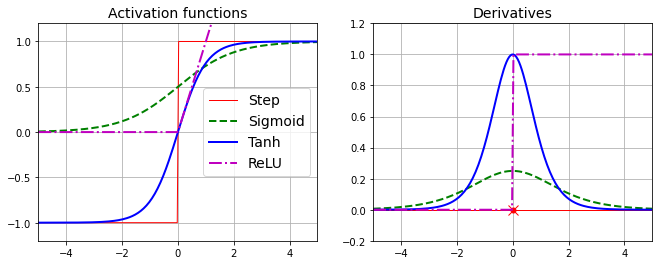

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [ ]:

import tensorflow as tf
import numpy as np

## data 선언
x_data = [[0.,0.], [0.,1.], [1.,0.],[1.,1.]]
y_data = [[1.], [0.], [0.], [1.]]

## tf.keras를 활용한 perceptron 모델 구현.
input_Layer = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(2, activation='sigmoid')(input_Layer)
Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary() # 층을 쌓은걸 볼수 있다.

# 모델 loss, 학습 방법 결정하기
optimizer=tf.keras.optimizers.SGD(lr=0.7) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.binary_crossentropy  ## 예측값 과 정답의 오차값 정의. mse는 mean squre error로 (예측값 - 정답)^2 를 의미
metrics=tf.keras.metrics.binary_accuracy ### 학습하면서 평가할 메트릭스 선언언

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

# 모델 동작하기
model.fit(x_data, y_data, epochs=100, batch_size=4)
# model.fit(x_data,y_data, epochs=1000,)


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 270ms/step - loss: 0.7166 - binary_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7061 - binary_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7006 - binary_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6977 - b

In [ ]:
import tensorflow as tf

tf.random.set_seed(777) # 시드를 설정 함.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

# 데이터 준비하기
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

# XOR gate이기 때문에 y값은 0,1,1,0임

#모델 구성하기

model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation = 'relu')) # 32개로 여러개로 쌓음.
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델 준비하기

model.compile(optimizer = 'adam',
              loss = mse,
              metrics = ['acc']) #list형태로 평가지표를 전달

#학습시키기

model.fit(x,y,epochs = 100)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 274ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2638 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2629 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2621 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2614 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 5m

## 학습률에 따른 경사하강법(백견불여일타 책 참고)

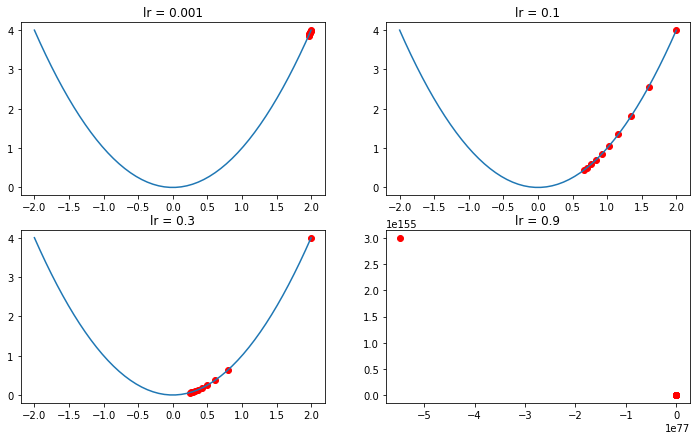

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lr_list = [0.001, 0.1, 0.3, 0.9]

def get_derivative(lr_list):

  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y = x^2로 정의함.

  for i in range(1,10):
    #먼저 해당 위치에서 미분값을 구함

    dev_value = w_old **2

    #위의 값을 이용하여 가중치를 업데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old) #업데이트 된 가중치를 저장 함,.
    y.append(w_old ** 2) #업데이트 된 가중치의 손실값을 저장 함.

  return derivative, y

x = np.linspace(-2,2,50) 
x_square = [i**2 for i in x]

fig = plt.figure(figsize=(12, 7))

for i,lr in enumerate(lr_list):
  derivative, y =get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color = 'red')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))

plt.show()

## MNIST Dataset with perceptron(백견불여일타 책 참고)

In [ ]:
# MNIST 데이터를 다운로드 한다.
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


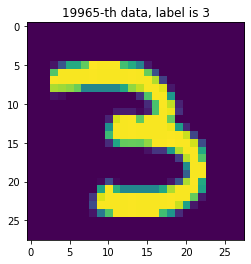

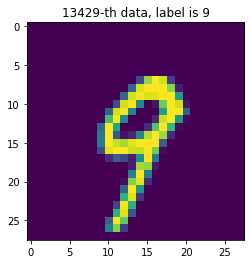

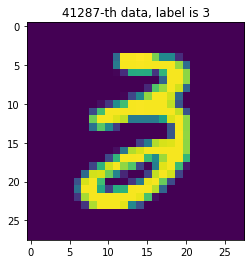

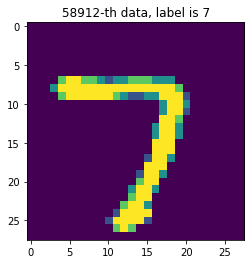

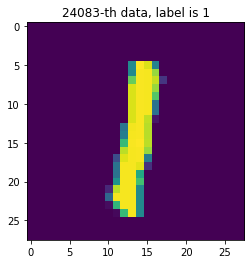

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 5 
# 0~59999이 범위에서 세 개의 정수를 뽑는다.
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx, label))

In [ ]:
# 검증 데이터 만들기

from sklearn.model_selection import train_test_split

#훈련/테스트 데이터를 0.7/0.3 의 비율로 분리

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =777) # test size는 테스트셋의 비율 의미. random_state는 재산성을 위해 사용(random_seed와 동일)

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [ ]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

#모델에 입력하기 전 전처리 과정.
x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28)))/ 255

print(x_train.shape)  # 모델 입력을 위해 데이터를 784차원으로 변경

(42000, 784)


(28,28) 형태의 데이터를 784차원의 1차원 배열로 변환 한것을 볼 수 있다. 신경망은 입력 데이터의 스케일에 매우 민감하므로 적절한 전처리 과정이 필수.

이에 대한 큰 이유로는 그래디언트 손실과 그래디언트 폭발로 인해 학습이 진행되지 않기 때문. 우리가 숫자 이미지 데이터는 각 픽셀 값이 0~255의 범위에 있기 때문에 255로 나누어 줌.

**여러 가지의 전처리 방법- 스케일링 방법**

Normalization(Min Max) :  $X$ = ${\dfrac {x-x_{min}}{x_{max}-x_{min}}}$

Robust Normalization :  $X$ = ${\dfrac {x-x_{2/4}}{x_{3/4}-x_{1/4}}}$

Standardization : $X$ = ${\dfrac {x-x_{mean}}{x_{std}}}$

In [ ]:
from tensorflow.keras.utils import to_categorical

#각 데이터의 레이블을 범주형 형태로 변경. # 수치형이 아님 X 저 데이터는 범주형(문자형)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 모델 구성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#입력 데이터의 형태를 명시해야됨.
# 784 차원의 데이터를 입력을 받고, 64개의 출력을 가지는 첫번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [ ]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m #exp의 오버플로우 방지  참고 : https://mkmehpp.tistory.com/2
  arr = np.exp(arr)
  return arr/ np.sum(arr)

def sigmoid(x):
  return 1/(1+np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [ ]:
# 학습과정 설정하기.
model.compile(optimizer = 'adam', #옵티마이저 : Adam
              #손실함수 : categorical_crossentropy
              loss = 'categorical_crossentropy',
              # 모니터링 할 평가지표 : acc
              metrics = ['acc'])

In [ ]:
# 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val,y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.9283 - acc: 0.7166 - val_loss: 0.2579 - val_acc: 0.9307
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.2334 - acc: 0.9334 - val_loss: 0.1935 - val_acc: 0.9458
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1692 - acc: 0.9520 - val_loss: 0.1635 - val_acc: 0.9527
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1345 - acc: 0.9608 - val_loss: 0.1397 - val_acc: 0.9586
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1094 - acc: 0.9689 - val_loss: 0.1329 - val_acc: 0.9607
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0960 - acc: 0.9721 - val_loss: 0.1232 - val_acc: 0.9641
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0772 - acc: 0.9766 - val_loss: 0.1191 - val_acc: 0.9651
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

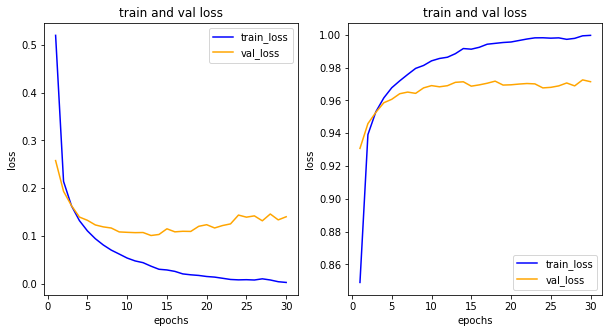

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()


plt.show()

In [ ]:
# 모델 평가하기

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1362 - acc: 0.9726


[0.13624973595142365, 0.972599983215332]

In [ ]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 :  {results[0]}')

(10000, 10)
각 클래스에 속할 확률 :  [1.4306579e-12 4.8736720e-13 4.6729951e-07 1.7714385e-08 2.7937074e-16
 1.6694109e-13 5.2568268e-20 9.9999952e-01 8.4975768e-12 3.2916272e-09]


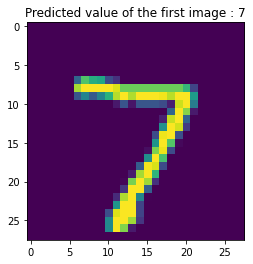

In [ ]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) #  가장 큰 값의 인덱스를 가져옴
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' +str(arg_results[0]))
plt.show()

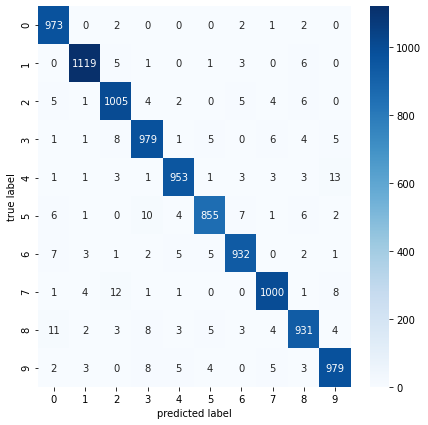

In [ ]:
#모델 평가 방법 1 -> 혼동행렬

#sklearn.metrics 모듈을 여러 가지 평가지표에 관한 기능을 제공함.

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#혼동행렬을 만듬.
plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show() 

In [ ]:
#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## HW) Fashion MNIST에서도 동일하게 해보자.

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 MNIST 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

네트워크를 훈련하는데 60,000개의 이미지를 사용합니다. 그다음 네트워크가 얼마나 정확하게 이미지를 분류하는지 10,000개의 이미지로 평가하겠습니다. 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 적재할 수 있습니다:

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']